In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nafflib

---
# Loading LHC tracking exemple
---

In [2]:
# =================================
num_turns = int(3e4)
files = [
    nafflib.__path__[0] + f"/../tests/data/LHC_particle_{s}_momentum_{i}sigma.csv"
    for s in ["on", "off"]
    for i in [1, 3, 5]
]


# -------------------
def read_csv(filename):
    filecontent = np.genfromtxt(
        filename,
        delimiter=",",
        skip_header=1,
        converters={col: lambda s: complex(s.decode()) for col in [1, 3, 5]},
        unpack=True,
    )
    data = {}
    data["Ax"] = filecontent[1]
    data["Qx"] = filecontent[2]
    data["Ay"] = filecontent[3]
    data["Qy"] = filecontent[4]
    data["Azeta"] = filecontent[5]
    data["Qzeta"] = filecontent[6]
    return data


# -------------------
example_signals = []
for file in files:
    data = read_csv(file)
    data["name"] = file
    for plane in ["x", "y", "zeta"]:
        z, pz = nafflib.generate_signal(
            data[f"A{plane}"], data[f"Q{plane}"], np.arange(num_turns)
        )
        data[f"{plane}"] = z
        data[f"p{plane}"] = pz
    example_signals.append(data)
# =================================

---
# Plotting discrete fourier transform
---

Text(0, 0.5, '|Amplitude|')

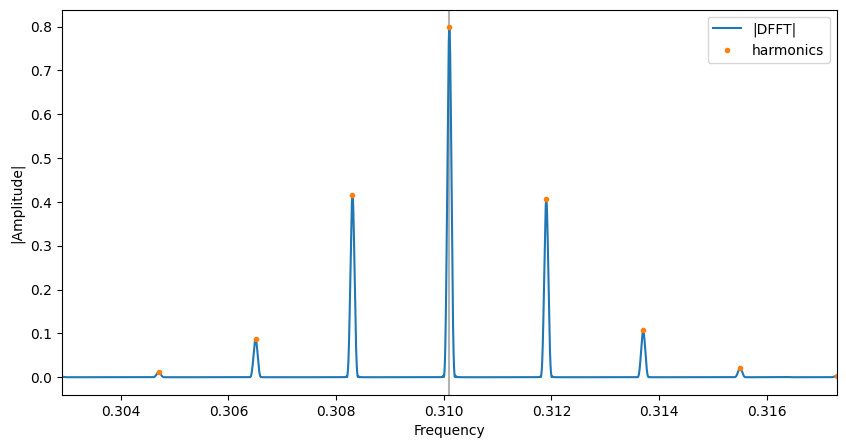

In [3]:
plane    = 'x'
num_harm = 10
for data in example_signals:
    if 'LHC_particle_off_momentum_1sigma' not in data['name']:
        continue

    Q_vec = [nafflib.tune(data[f"{plane}"], data[f"p{plane}"], window_order=4)
                for plane in ["x", "y", "zeta"]]
    
    signal = data[f"{plane}"] - 1j*data[f"p{plane}"]
    A, Q = nafflib.harmonics(signal,
                                num_harmonics=num_harm , 
                                window_order=4, 
                                window_type="hann")





# Creating frequency vector to plot
delta_nu = np.abs(Q_vec[-1]/500)
nu = np.arange(Q_vec[0]-4*np.abs(Q_vec[-1]),Q_vec[0]+4*np.abs(Q_vec[-1]),delta_nu)

# Evaluating the DFFT @ nu
Q0_dfft =  nafflib.fundamental_dfft(nu, signal,window_order=2, window_type="hann")

# Plotting
#----
plt.figure(figsize=(10,5))
plt.plot(nu,np.abs(Q0_dfft),'-',label=f'|DFFT|')
plt.plot(Q,np.abs(A),'.',label='harmonics')
#----
plt.axvline(Q_vec[0],color='k',alpha=0.3,zorder=-10)
plt.xlim([nu[0],nu[-1]])
plt.legend()
plt.xlabel('Frequency')
plt.ylabel('|Amplitude|')



---
# Plotting for different harmonics
---

Text(0, 0.5, '|Amplitude|')

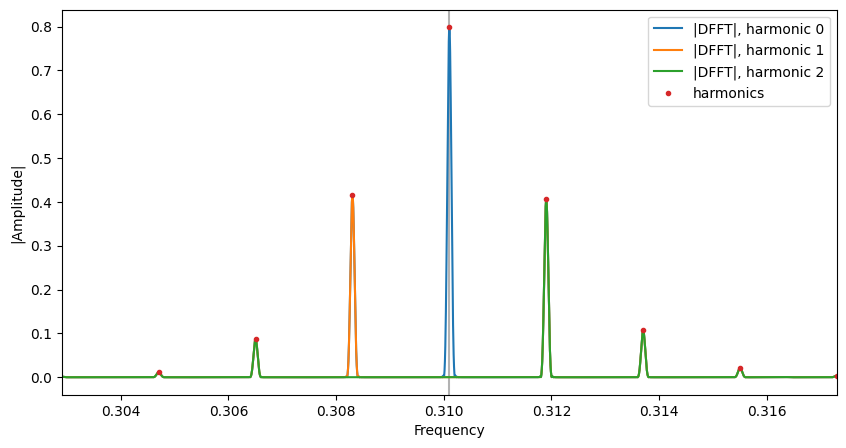

In [4]:
plane    = 'x'
num_harm = 10
for data in example_signals:
    if 'LHC_particle_off_momentum_1sigma' not in data['name']:
        continue

    Q_vec = [nafflib.tune(data[f"{plane}"], data[f"p{plane}"], window_order=4)
                for plane in ["x", "y", "zeta"]]
    
    signal = data[f"{plane}"] - 1j*data[f"p{plane}"]
    A, Q = nafflib.harmonics(signal,
                                num_harmonics=num_harm , 
                                window_order=4, 
                                window_type="hann")





# Creating frequency vector to plot
delta_nu = np.abs(Q_vec[-1]/500)
nu = np.arange(Q_vec[0]-4*np.abs(Q_vec[-1]),Q_vec[0]+4*np.abs(Q_vec[-1]),delta_nu)

# Evaluating the DFFT @ nu
Q0_dfft_list =  nafflib.naff_dfft(nu, signal,num_harmonics=3,window_order=2, window_type="hann")

# Plotting
#----
plt.figure(figsize=(10,5))
for _i,Q0_dfft in enumerate(Q0_dfft_list):
    plt.plot(nu,np.abs(Q0_dfft),'-',label=f'|DFFT|, harmonic {_i}')
plt.plot(Q,np.abs(A),'.',label='harmonics')
#----
plt.axvline(Q_vec[0],color='k',alpha=0.3,zorder=-10)
plt.xlim([nu[0],nu[-1]])
plt.legend()
plt.xlabel('Frequency')
plt.ylabel('|Amplitude|')

